In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/topSubscribed.csv');

In [ ]:
data.describe()

,Rank,Started
count,1000.000000,1000.000000
mean,500.500000,2012.594000
std,288.819436,4.110238
min,1.000000,1970.000000
25%,250.750000,2010.000000
50%,500.500000,2013.000000
75%,750.250000,2015.000000
max,1000.000000,2021.000000


In [ ]:
data.describe()

,Rank,Started
count,1000.000000,1000.000000
mean,500.500000,2012.594000
std,288.819436,4.110238
min,1.000000,1970.000000
25%,250.750000,2010.000000
50%,500.500000,2013.000000
75%,750.250000,2015.000000
max,1000.000000,2021.000000


In [ ]:
data.shape

(1000, 7)

In [ ]:
data.isna().sum()

Rank               0
Youtube Channel    0
Subscribers        0
Video Views        0
Video Count        0
Category           0
Started            0
dtype: int64

In [ ]:
data.isnull().sum()

Rank               0
Youtube Channel    0
Subscribers        0
Video Views        0
Video Count        0
Category           0
Started            0
dtype: int64

In [ ]:
data.dtypes

Rank                int64
Youtube Channel    object
Subscribers        object
Video Views        object
Video Count        object
Category           object
Started             int64
dtype: object

In [ ]:
data['Category'].value_counts()      # Breakdown by Category


Entertainment                                                                   238
Music                                                                           217
People & Blogs                                                                  132
Gaming                                                                           94
Comedy                                                                           68
Film & Animation                                                                 50
Education                                                                        45
Howto & Style                                                                    43
https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels     30
News & Politics                                                                  27
Science & Technology                                                             18
Shows                                                                       

In [ ]:
data = data.replace(',','', regex=True)      # Removing delimeters


# Converting strings to integers
data[['Subscribers','Video Views','Video Count']] = data[['Subscribers','Video Views','Video Count']].astype(int)

In [ ]:
data.dtypes # View changes


Rank                int64
Youtube Channel    object
Subscribers         int64
Video Views         int64
Video Count         int64
Category           object
Started             int64
dtype: object

In [ ]:
# Removing URL category
data = data[data.Category != 'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels']

data['Category'].value_counts() # Breakdown by Category 

Entertainment            238
Music                    217
People & Blogs           132
Gaming                    94
Comedy                    68
Film & Animation          50
Education                 45
Howto & Style             43
News & Politics           27
Science & Technology      18
Shows                     14
Sports                    10
Pets & Animals             6
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           1
Travel & Events            1
Name: Category, dtype: int64

In [ ]:
# Channel with highest views
data.iloc[data['Video Views'].argmax()]

Rank                          1
Youtube Channel        T-Series
Subscribers           234000000
Video Views        212900271553
Video Count               18515
Category                  Music
Started                    2006
Name: 0, dtype: object

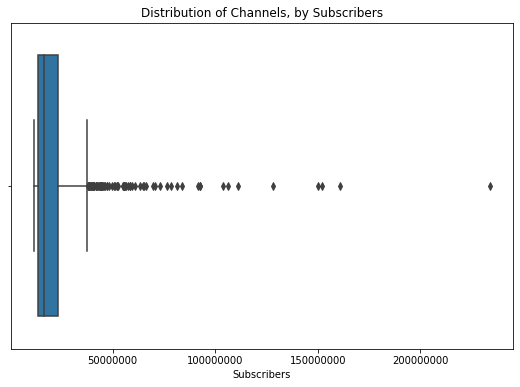

In [ ]:
plt.figure(figsize=(9,6))
plt.title("Distribution of Channels, by Subscribers")
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=data['Subscribers'])
plt.show()

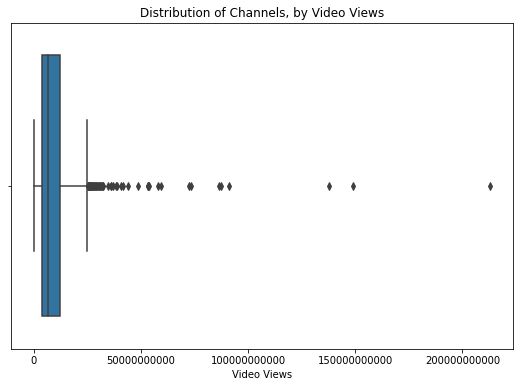

In [ ]:
plt.figure(figsize=(9,6))
plt.title("Distribution of Channels, by Video Views")
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=data['Video Views'])
plt.show()

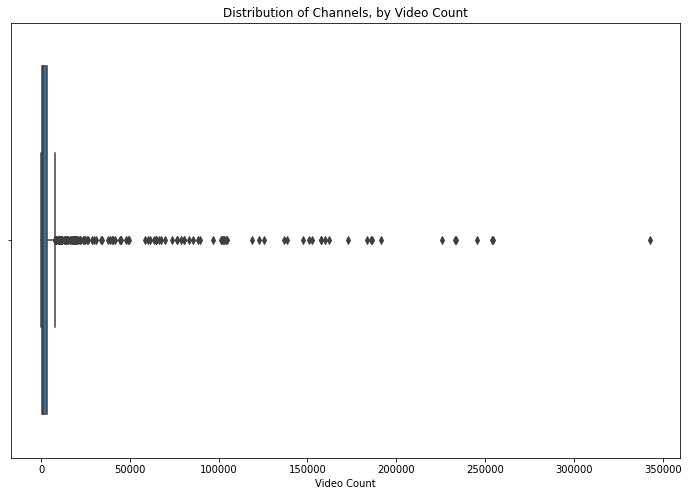

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Distribution of Channels, by Video Count")
sns.boxplot(x=data['Video Count'])
plt.show()

In [ ]:
# New dataframe to hold category value count
df_byCat = data['Category'].value_counts().to_frame('Count').rename_axis('Category').reset_index()

df_byCat 

,Category,Count
0,Entertainment,238
1,Music,217
2,People & Blogs,132
3,Gaming,94
4,Comedy,68
5,Film & Animation,50
6,Education,45
7,Howto & Style,43
8,News & Politics,27
9,Science & Technology,18


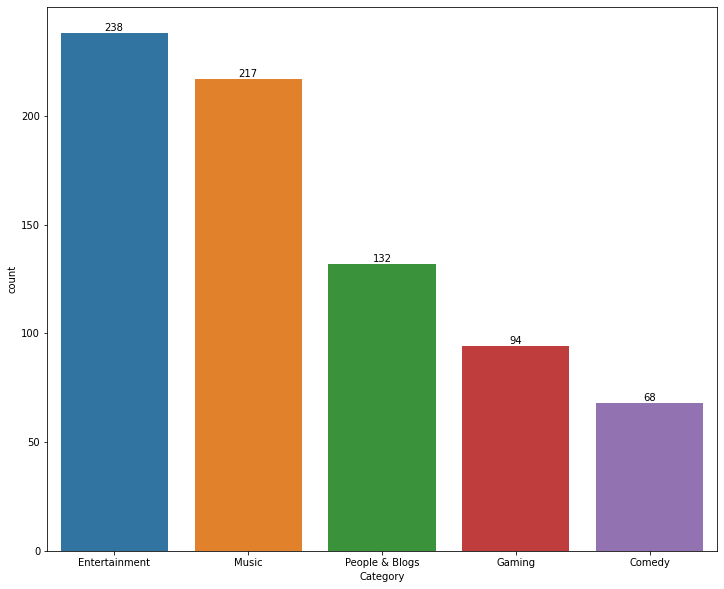

In [ ]:
top5 = data["Category"].value_counts().head(5)

plt.figure(figsize=(12,10))

ax = sns.countplot(x=data["Category"],order=top5.index)
ax.bar_label(ax.containers[0])
plt.show()

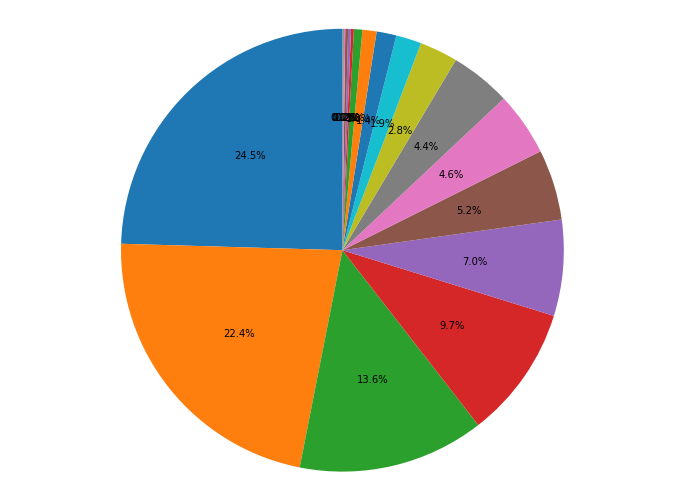

In [ ]:
labels = df_byCat['Category']
plt.figure(figsize=(12,9))
plt.pie(df_byCat['Count'], autopct='%1.1f%%',shadow=False, startangle=90)
plt.axis('equal')
plt.show()